In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [45]:
plt.rcParams['figure.figsize'] = [20, 10]

In [46]:
def read_log(fname):
    file = open(fname, 'r')
    x = []
    accuracy = []
    next(file)
    for line in file.readlines():
        it, current, target, prediction, correct, loss = line.replace('\n','').split(',')
        x.append(float(it))
        accuracy.append(float(correct))
    return x, accuracy

In [47]:
def moving_average(a, n):
    moving_average = []
    for i in range(len(a)):
        start = max(0, i - n)
        values = a[start:i+1]
        moving_average.append(np.sum(values) / float(len(values)))
    return np.array(moving_average)

In [48]:
logs = [i for i in os.listdir('.') if '.log' in i]

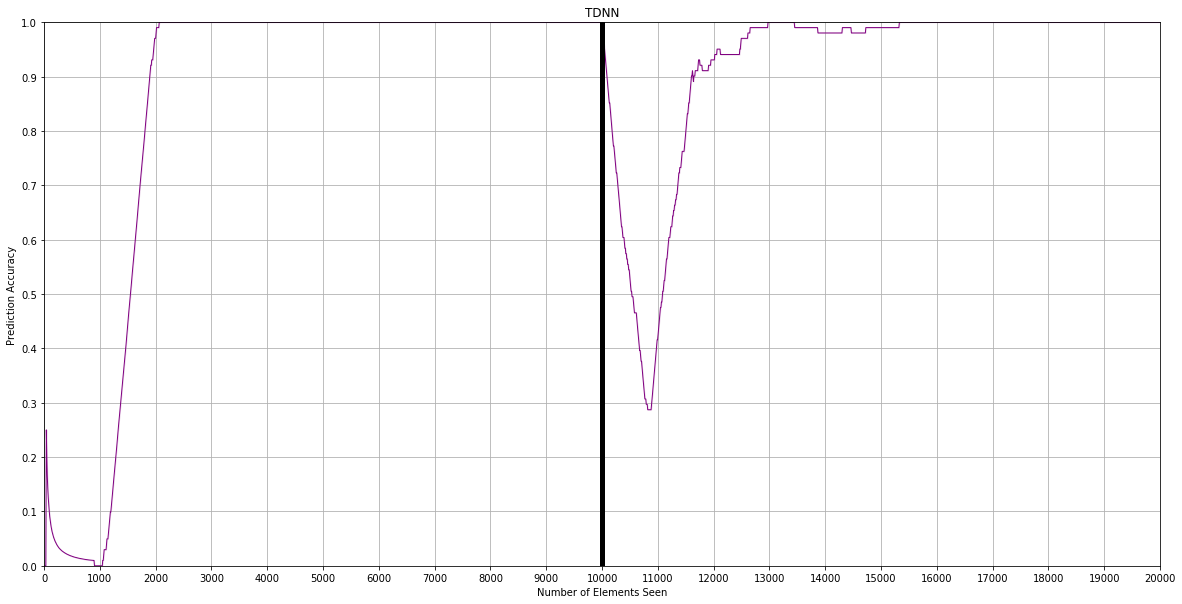

In [49]:
averages = []
x = None
for log in logs:
    x, acc = read_log(log)
    mv = moving_average(acc, min(len(acc), 100))
    averages.append(mv)
plt.plot(x, np.mean(averages, axis=0), label='online-LSTM', linewidth=1, color=(0.5,0,0.5))
plt.fill_between(x, (np.mean(averages, axis=0)+np.std(averages, axis=0)), (np.mean(averages, axis=0)-np.std(averages, axis=0)), color=(0.5,0,0.5,0.1))
plt.plot([10000, 10000], [0, 1], linewidth=5, color='black')
plt.ylim(0, 1.0)
plt.xlim(0, 20000)
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(np.arange(0, 20001, 1000))
plt.title('TDNN')
plt.ylabel('Prediction Accuracy')
plt.xlabel('Number of Elements Seen')
plt.grid()
plt.savefig('tdnn.pdf', dpi=100)
plt.show()